<a href="https://colab.research.google.com/github/ankit-singh973/Deep_Learning_tensorflow/blob/main/3_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiclass Classification**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


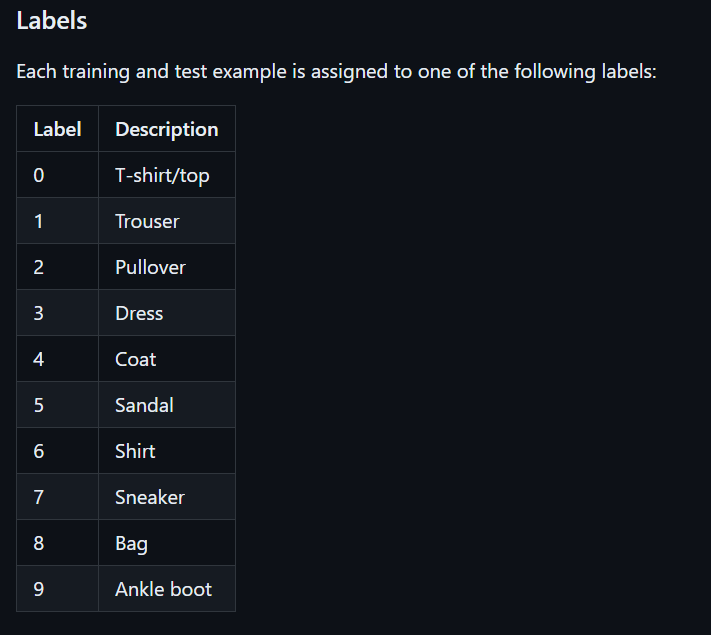

In [2]:
train_data[0].shape

(28, 28)

In [3]:
train_labels[0]

9

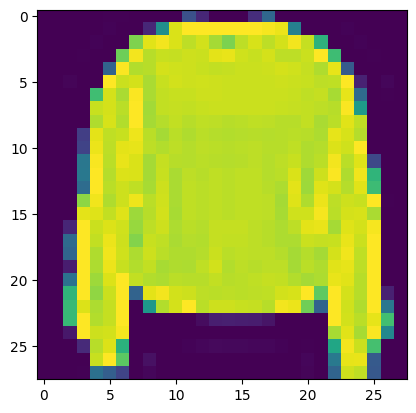

In [4]:
#plot a single sample

import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [5]:
train_labels[7]

2

In [6]:
# Making it human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

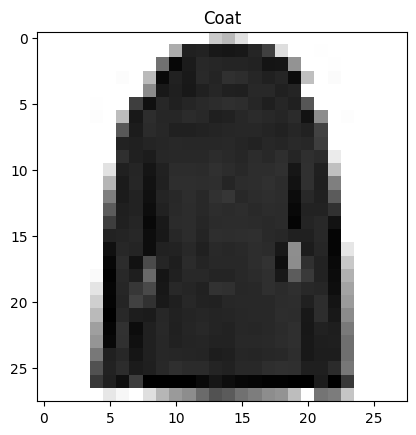

In [7]:
# Plot and example image and it's label

index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

## **Building a Multiclass Classification**

For our multiclass classification model, we can use a similar archiecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
- Loss function = tf.keras.losses.CategoricalCrossentropy()
  - `CategoricalCrossentropy()` => dataset must be one-hot encoded.
  - `SparseCrossentropy()` => dataset can contain continuous numerical values.
- Output layer activation = Softmax (not sigmoid)

### **What does `flatten` do ?**
- We need to flatten our input layer

In [ ]:
print(tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28))]).output_shape, "\n")
print("28 x 28 = ", 28*28)

(None, 784) 

28 x 28 =  784


In [10]:
#set random seed
tf.keras.utils.set_random_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # neural networks likes everything to be in one long vector
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(), # expect the input to be one-hot encoded
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        tf.one_hot(train_labels, depth = 10),
                        epochs = 10,
                        validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9826 - accuracy: 0.2490 - val_loss: 1.5192 - val_accuracy: 0.3500
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4933 - accuracy: 0.3739 - val_loss: 1.3083 - val_accuracy: 0.4457
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0865 - accuracy: 0.5398 - val_loss: 1.0078 - val_accuracy: 0.5635
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9318 - accuracy: 0.6010 - val_loss: 0.9135 - val_accuracy: 0.6140
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8813 - accuracy: 0.6228 - val_loss: 0.8759 - val_accuracy: 0.6299
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8718 - accuracy: 0.6267 - val_loss: 0.8813 - val_accuracy: 0.6177
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8526 - accuracy: 0.6310 - val_loss: 0.8848 - val_accuracy:

In [11]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 100)               1100      
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 14510 (56.68 KB)
Trainable params: 14510 (56.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- We didn't get good accuracy.
- So we normalize the data and build the model.

### **To get data ready for tensors:**
> 1. Turn all data into numbers
> 2. Make sure all of your tensors are in right shape
> 3. Scale features (normalize or standardize, neural networks tend to prefer normalization)


## **Building model after Normalizing the data**

In [13]:
#check the min and max of training data
train_data.min(), train_data.max()

(0, 255)

- Right now our data is between 0 and 255

In [14]:
# Normalizing our data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [16]:
# check the min and max of scaled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
#set random seed
tf.keras.utils.set_random_seed(42)

# Create the model
model_1_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_1_norm.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Fit the model
history_1_norm = model_1_norm.fit(train_data_norm,
                        tf.one_hot(train_labels, depth = 10),
                        epochs = 20,
                        validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5822 - accuracy: 0.7904 - val_loss: 0.4745 - val_accuracy: 0.8310
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4203 - accuracy: 0.8497 - val_loss: 0.5076 - val_accuracy: 0.8208
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3902 - accuracy: 0.8583 - val_loss: 0.4307 - val_accuracy: 0.8426
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3690 - accuracy: 0.8651 - val_loss: 0.4134 - val_accuracy: 0.8494
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3590 - accuracy: 0.8688 - val_loss: 0.3976 - val_accuracy: 0.8550
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3478 - accuracy: 0.8719 - val_loss: 0.4133 - val_accuracy: 0.8434
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3393 - accuracy: 0.8752 - val_loss: 0.4186 - val_accuracy:

In [17]:
model_1_norm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 100)               1100      
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 10)                510       
                                                                 
Total params: 14510 (56.68 KB)
Trainable params: 14510 (56.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
import pandas as pd

<Axes: title={'center': 'Normalized data'}>

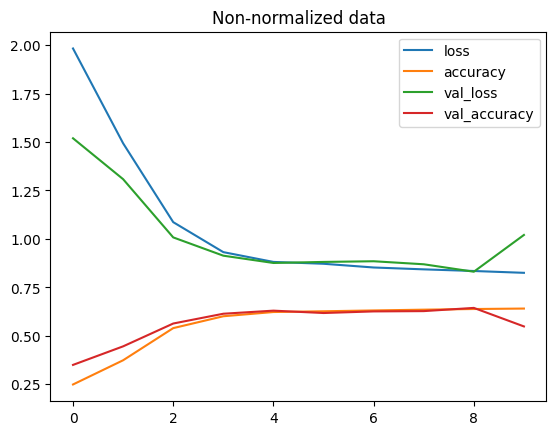

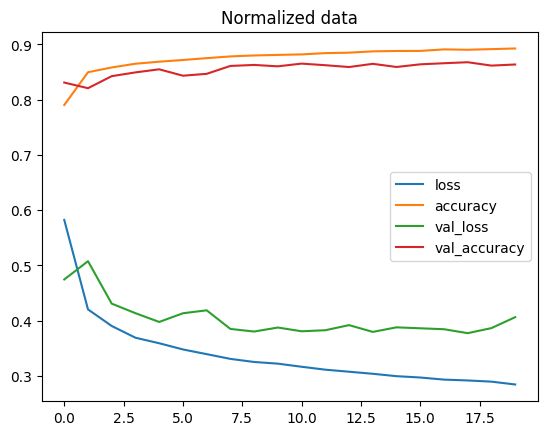

In [19]:
pd.DataFrame(history_1.history).plot(title = "Non-normalized data")
pd.DataFrame(history_1_norm.history).plot(title = "Normalized data")

## **Finding the ideal Learning Rate**

In [22]:
# set random seed
tf.keras.utils.set_random_seed(42)

# create a model
model_l3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "Softmax")
])

# Compile model
model_l3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_l3.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2915 - accuracy: 0.5021 - val_loss: 0.9645 - val_accuracy: 0.6112 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8796 - accuracy: 0.6454 - val_loss: 0.8428 - val_accuracy: 0.6661 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7519 - accuracy: 0.7072 - val_loss: 0.7093 - val_accuracy: 0.7341 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6611 - accuracy: 0.7554 - val_loss: 0.6712 - val_accuracy: 0.7762 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6079 - accuracy: 0.7913 - val_loss: 0.6152 - val_accuracy: 0.7956 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5770 - accuracy: 0.8035 - val_loss: 0.6442 - val_accuracy: 0.7796 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8s

### Plot learning rate decay curve

Text(0.5, 1.0, 'finding the ideal learning rate')

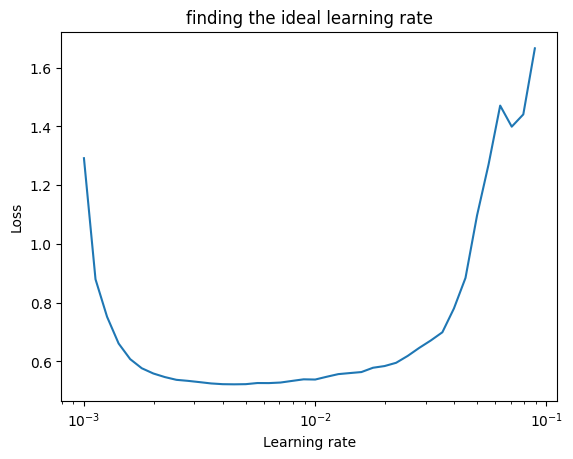

In [23]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("finding the ideal learning rate")

- so the ideal learning rate is default value for Adam optimizer
- so we will set 10**-3 as learning rate

In [27]:
# set random seed
tf.keras.utils.set_random_seed(42)

# create a model
model_l4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "Softmax")
])

# Compile model
model_l4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# fit the model
history_l4 = model_l4.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2915 - accuracy: 0.5021 - val_loss: 0.9645 - val_accuracy: 0.6112
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8838 - accuracy: 0.6434 - val_loss: 0.8471 - val_accuracy: 0.6642
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7989 - accuracy: 0.6798 - val_loss: 0.7568 - val_accuracy: 0.7206
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6918 - accuracy: 0.7422 - val_loss: 0.6942 - val_accuracy: 0.7559
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6407 - accuracy: 0.7680 - val_loss: 0.6478 - val_accuracy: 0.7813
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6016 - accuracy: 0.7949 - val_loss: 0.6245 - val_accuracy: 0.7861
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5778 - accuracy: 0.8053 - val_loss: 0.6167 - val_accuracy:

## **Evaluating our mulit-class classification model**

To evaluate our multi-class classification model we could:
- Evaluate its performance using other classification metrics (such as confucion matrix)
- Asses some of its predictions (through visualization)
- Imporve its results (by training it for longer or changing the architecture)
- Save and export it for use i application

In [32]:
# make some predictions with our model
y_probs = model_l4.predict(test_data_norm)

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.78542095e-10, 8.04762073e-13, 3.92447547e-10, 5.30306443e-06,
        2.97074098e-06, 1.27893239e-01, 1.34005573e-09, 1.38686135e-01,
        5.42240217e-03, 7.27989972e-01],
       [9.81113967e-03, 1.53926798e-04, 7.09971130e-01, 5.72222518e-03,
        1.30021587e-01, 3.77866963e-04, 1.42457232e-01, 2.96866405e-04,
        7.93930842e-04, 3.94170231e-04],
       [1.45518488e-05, 9.98337269e-01, 8.31623836e-09, 1.64823001e-03,
        4.06960377e-09, 3.77736535e-18, 2.31061961e-08, 1.08327097e-16,
        3.17073763e-11, 1.10937279e-12],
       [2.17295138e-07, 9.99377668e-01, 6.98878524e-11, 6.22179650e-04,
        1.56150481e-10, 6.99046961e-17, 6.05434869e-11, 1.51042559e-14,
        1.73673194e-11, 1.51188905e-11],
       [8.82779360e-02, 3.17509781e-04, 3.61305803e-01, 1.65744331e-02,
        3.63433175e-02, 5.20377478e-04, 4.92240369e-01, 9.45506963e-06,
        4.36785072e-03, 4.28970925e-05]], dtype=float32)

In [34]:
y_probs[0], tf.argmax(y_probs[0])

(array([4.7854209e-10, 8.0476207e-13, 3.9244755e-10, 5.3030644e-06,
        2.9707410e-06, 1.2789324e-01, 1.3400557e-09, 1.3868614e-01,
        5.4224022e-03, 7.2798997e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [30]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):

  #create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  #Let's make it cute
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

 #set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = 'white' if cm[i, j] > threshold else "black",
            size = text_size)

In [46]:
# convert all of the prediction probabilities into integers
y_pred = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])

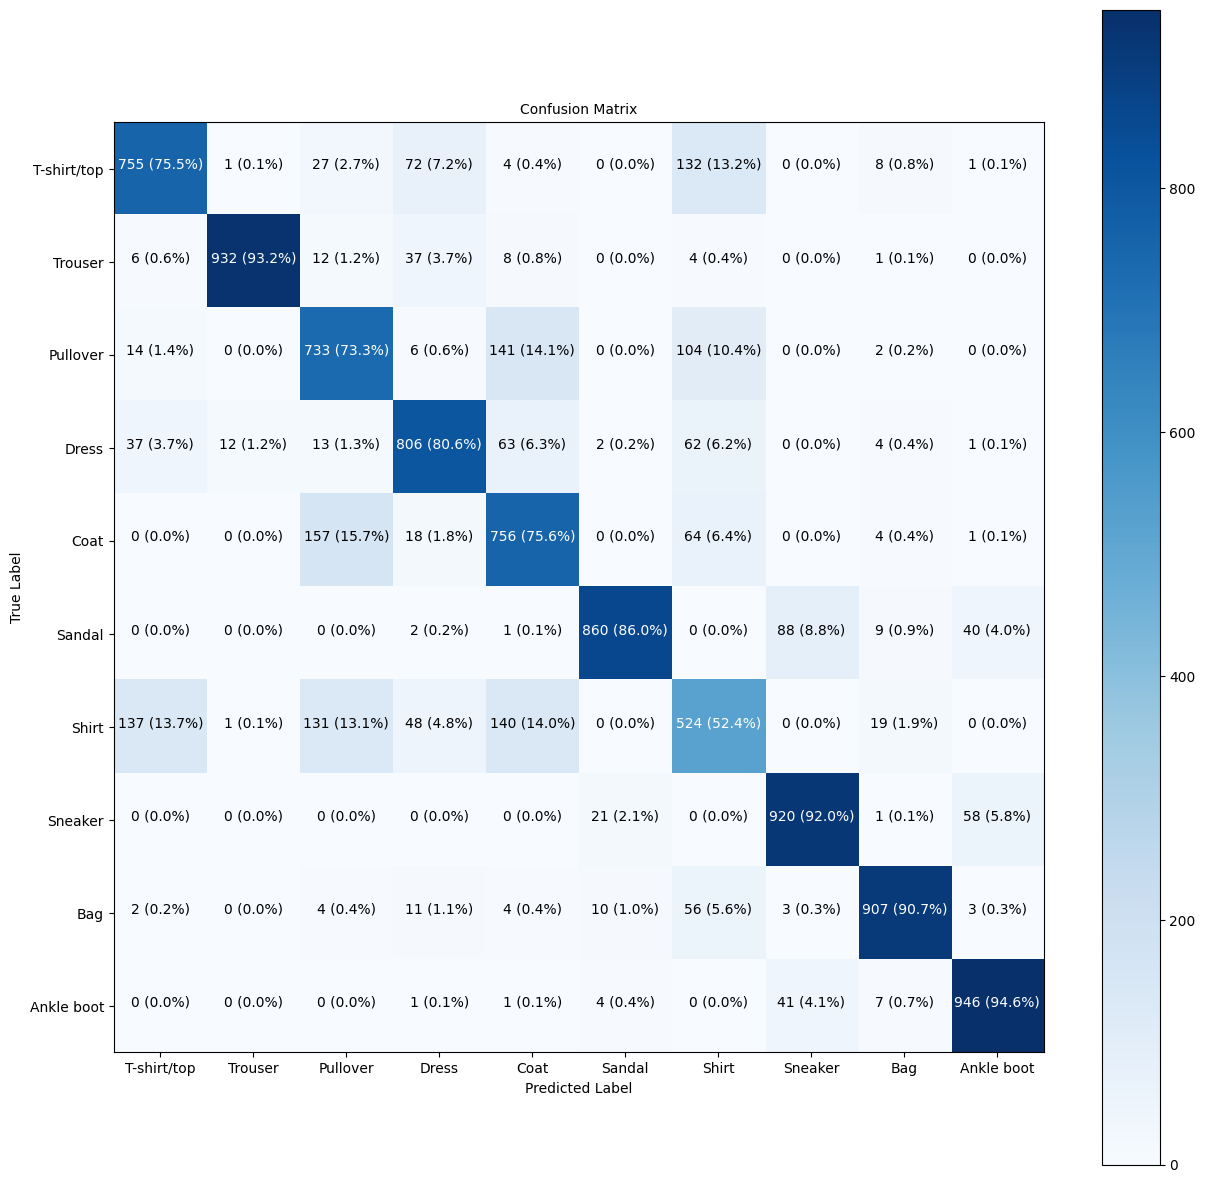

In [47]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_pred,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 10)

### **Visualize as much as possible**

In [50]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """

  # set up random number
  i = random.randint(0, len(images))

  # Create prediction and tragets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Pot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # change the colour of the titles depending on if the prediction is right or wrong
  if pred_label==true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

1/1 [==============================] - 0s 17ms/step


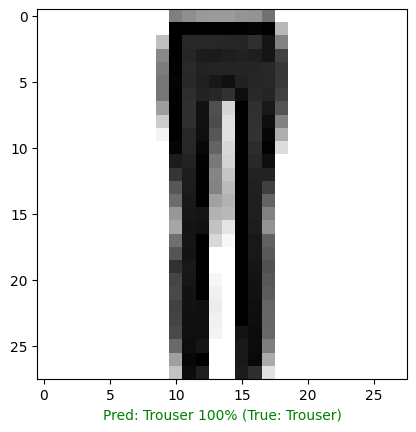

In [58]:
plot_random_image(model = model_l4,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

## **What patterns our model is learning?**

In [59]:
# Find the layers of our most recent model
model_l4.layers

In [61]:
# Extract a particular layer
model_l4.layers[1]

In [62]:
# Get the patterns of a layer in our network
weights, biases = model_l4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.5071112 ,  0.26845735,  0.48737526, -0.42939493],
        [ 0.76038116, -0.35287496,  0.0724441 , -0.7951279 ],
        [ 0.61240095, -0.43998152,  0.6214388 , -1.0543473 ],
        ...,
        [ 0.21765597, -0.4158395 , -0.38717017,  0.0718911 ],
        [-0.27957743, -0.25387898, -0.3899788 ,  0.5294474 ],
        [-1.3416134 , -0.14243896,  0.6538988 , -0.1983037 ]],
       dtype=float32),
 (784, 4))

In [63]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.3282666 ,  1.1720905 , -0.58115953, -0.40769556], dtype=float32),
 (4,))

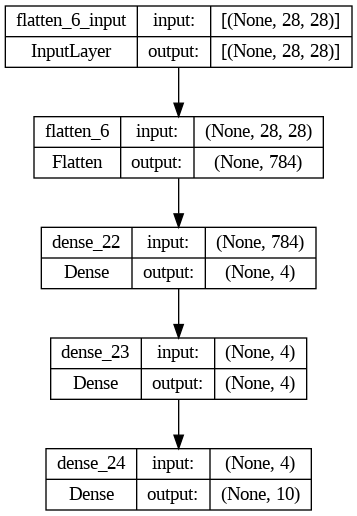

In [64]:
from tensorflow.keras.utils import plot_model

plot_model(model_l4, show_shapes = True)

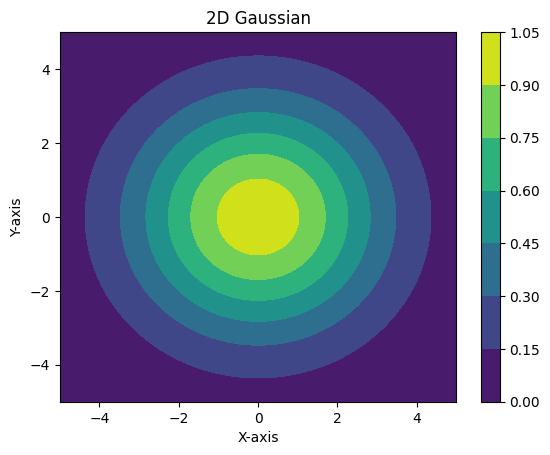

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Create coordinate vectors
a = np.linspace(-5, 5, 101)
b = np.linspace(-5, 5, 101)

# Create a 2D grid of x and y values using meshgrid
A, B = np.meshgrid(a, b)

# Compute a function on the grid (example: a 2D Gaussian)
Z = np.exp(-(A**2 + B**2) / 10)

# Plot the result
plt.contourf(A, B, Z, cmap='viridis')
plt.colorbar()
plt.title('2D Gaussian')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
